[[16.  9. 10.  6.  3.  4.  4.  4.  5.  2.  3.  1.  2.  5.  2.  2.  2.  2.
   2.  3.  2.  2.  2.  5.  3.  3.  2.  4.  3.  4.  4.  6. 12. 17.]]
k eig val are [2.77555756e-17+0.j 1.32272329e-01+0.j]
k eig vec are [[-0.32025631 -0.2963998 ]
 [-0.24019223 -0.11341389]
 [-0.25318484  0.00897113]
 [-0.19611614 -0.11512758]
 [-0.13867505 -0.2671717 ]
 [-0.16012815 -0.34638736]
 [-0.16012815 -0.34638736]
 [-0.16012815 -0.08992931]
 [-0.17902872  0.05282964]
 [-0.1132277   0.05563406]
 [-0.13867505 -0.2671717 ]
 [-0.08006408 -0.0853954 ]
 [-0.1132277  -0.09868424]
 [-0.17902872 -0.04671125]
 [-0.1132277   0.11251508]
 [-0.1132277   0.11251508]
 [-0.1132277  -0.28226926]
 [-0.1132277  -0.09119046]
 [-0.1132277   0.11251508]
 [-0.13867505 -0.03091925]
 [-0.1132277   0.11251508]
 [-0.1132277  -0.09119046]
 [-0.1132277   0.11251508]
 [-0.17902872  0.19602288]
 [-0.13867505  0.13544115]
 [-0.13867505  0.14515535]
 [-0.1132277   0.12748466]
 [-0.16012815  0.1349113 ]
 [-0.13867505  0.08022324]
 [-0.16

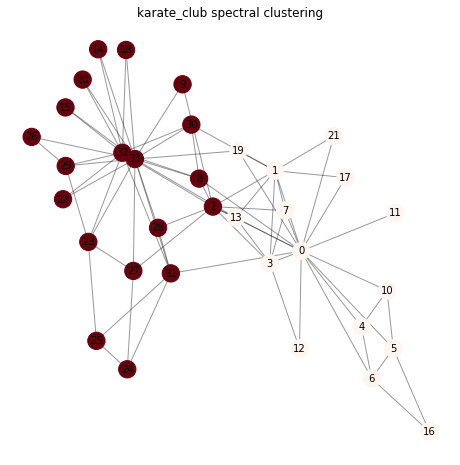

In [1]:
#coding=utf-8
 
#MSC means Multiple Spectral Clustering
 
import numpy as np
 
import scipy as sp
 
import scipy.linalg as linalg
 
import networkx as nx
 
import matplotlib.pyplot as plt
 
 
 
def getNormLaplacian(W):
 
    """input matrix W=(w_ij)
     
    "compute D=diag(d1,...dn)
     
    "and L=D-W
     
    "and Lbar=D^(-1/2)LD^(-1/2)
     
    "return Lbar
     
    """
     
    #d=[np.sum(row) for row in W]
    print(np.array(np.sum(W, axis = 0)))
    d = np.array(np.sum(W, axis = 0))[0] 
    D=np.diag(d)
     
    L=D-W
    
    Dn = np.linalg.inv(D)
    Dn = Dn**0.5
    
    #Dn2=np.power(np.linalg.matrix_power(D,-1),0.5)


    Lbar=np.dot(np.dot(Dn,L),Dn)
     
    return Lbar
 
 
 
def getKSmallestEigVec(Lbar,k):
 
    """input
     
    "matrix Lbar and k
     
    "return
     
    "k smallest eigen values and their corresponding eigen vectors
     
    """
     
    eigval,eigvec=linalg.eig(Lbar)
     
    dim=len(eigval)
     
     
     
    #查找前k小的eigval
     
    dictEigval=dict(zip(eigval,range(0,dim)))
     
    kEig=np.sort(eigval)[0:k]
     
    ix=[dictEigval[k] for k in kEig]
     
    return eigval[ix],eigvec[:,ix]
 
 
 
def checkResult(Lbar,eigvec,eigval,k):
 
    """
     
    "input
     
    "matrix Lbar and k eig values and k eig vectors
     
    "print norm(Lbar*eigvec[:,i]-lamda[i]*eigvec[:,i])
     
    """
     
    check=[np.dot(Lbar,eigvec[:,i])-eigval[i]*eigvec[:,i] for i in range(0,k)]
     
    length=[np.linalg.norm(e) for e in check]/np.spacing(1)
     
    print("Lbar*v-lamda*v are %s*%s" % (length,np.spacing(1)))
 
 
 
g=nx.karate_club_graph()
 
nodeNum=len(g.nodes())
 
m=nx.to_numpy_matrix(g)
# m is adj matrix
#print(m.shape)
Lbar=getNormLaplacian(m)
# get NormLaplacian
k=2
 
kEigVal,kEigVec=getKSmallestEigVec(Lbar,k)
 
print("k eig val are %s" % kEigVal)
 
print("k eig vec are %s" % kEigVec)
 
checkResult(Lbar,kEigVec,kEigVal,k)
 
 
 
#did not use k means，just use a simple evidence to judge
 
 
 
clusterA=[i for i in range(0,nodeNum) if kEigVec[i,1]>0]
 
clusterB=[i for i in range(0,nodeNum) if kEigVec[i,1]<0]
 
 
 
#draw graph
 
colList=dict.fromkeys(g.nodes())
 
for node,score in colList.items():
 
    if node in clusterA:
     
        colList[node]=0
 
    else:
     
        colList[node]=1
#print(colList[1])
#colList[1] = 2

plt.figure(figsize=(8,8))
 
pos=nx.spring_layout(g)
 
nx.draw_networkx_edges(g,pos,alpha=0.4)
 
nx.draw_networkx_nodes(g,pos,nodelist=colList.keys(),
node_color=list(colList.values()),
cmap=plt.cm.Reds_r)
 
nx.draw_networkx_labels(g,pos,font_size=10,font_family='sans-serif')
 
plt.axis('off')
 
plt.title("karate_club spectral clustering")
 
plt.savefig("spectral_clustering_result.png")
 
plt.show()